In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter, MonthLocator, YearLocator, DateFormatter
import matplotlib.dates as mdates

## Residential

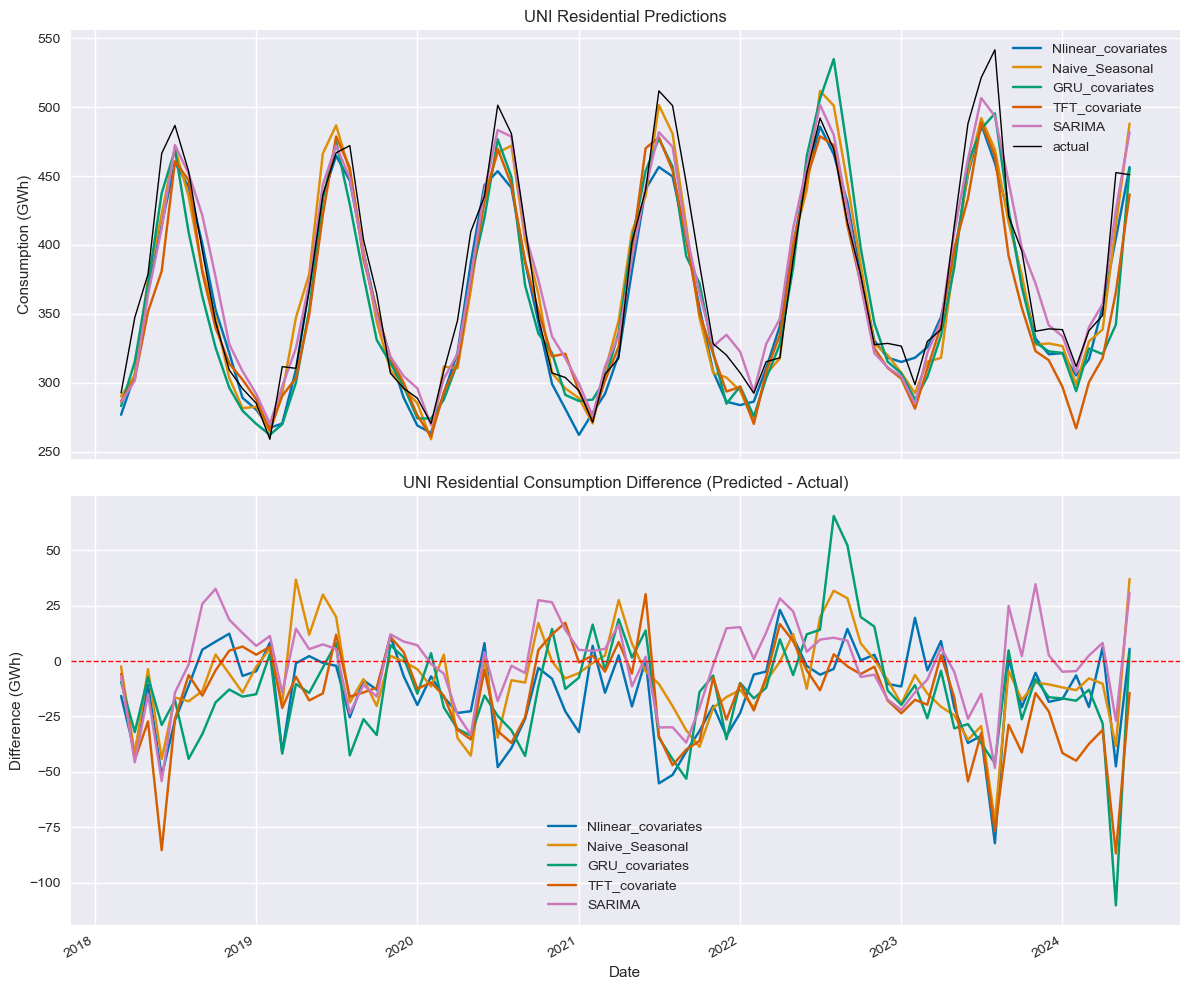

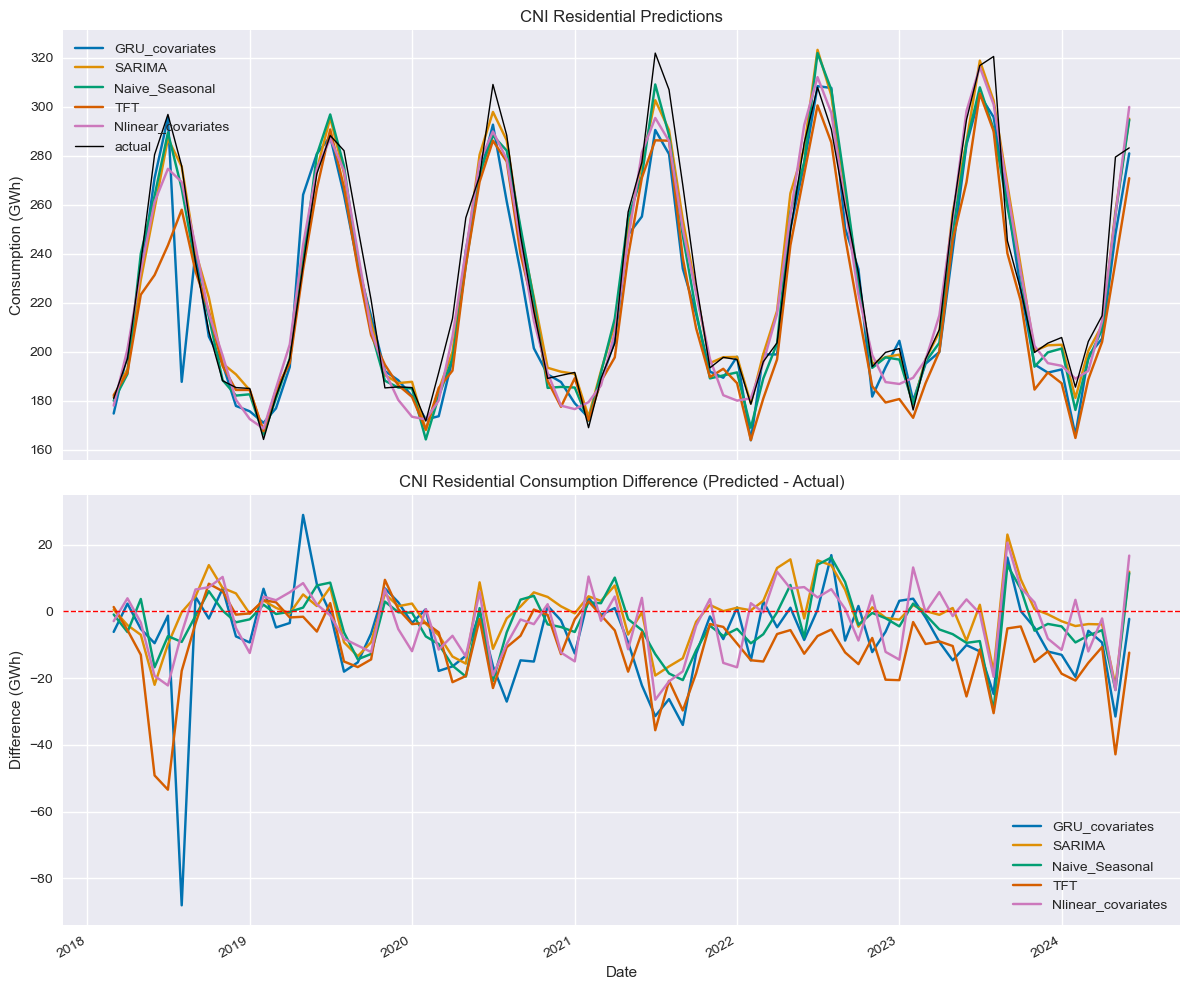

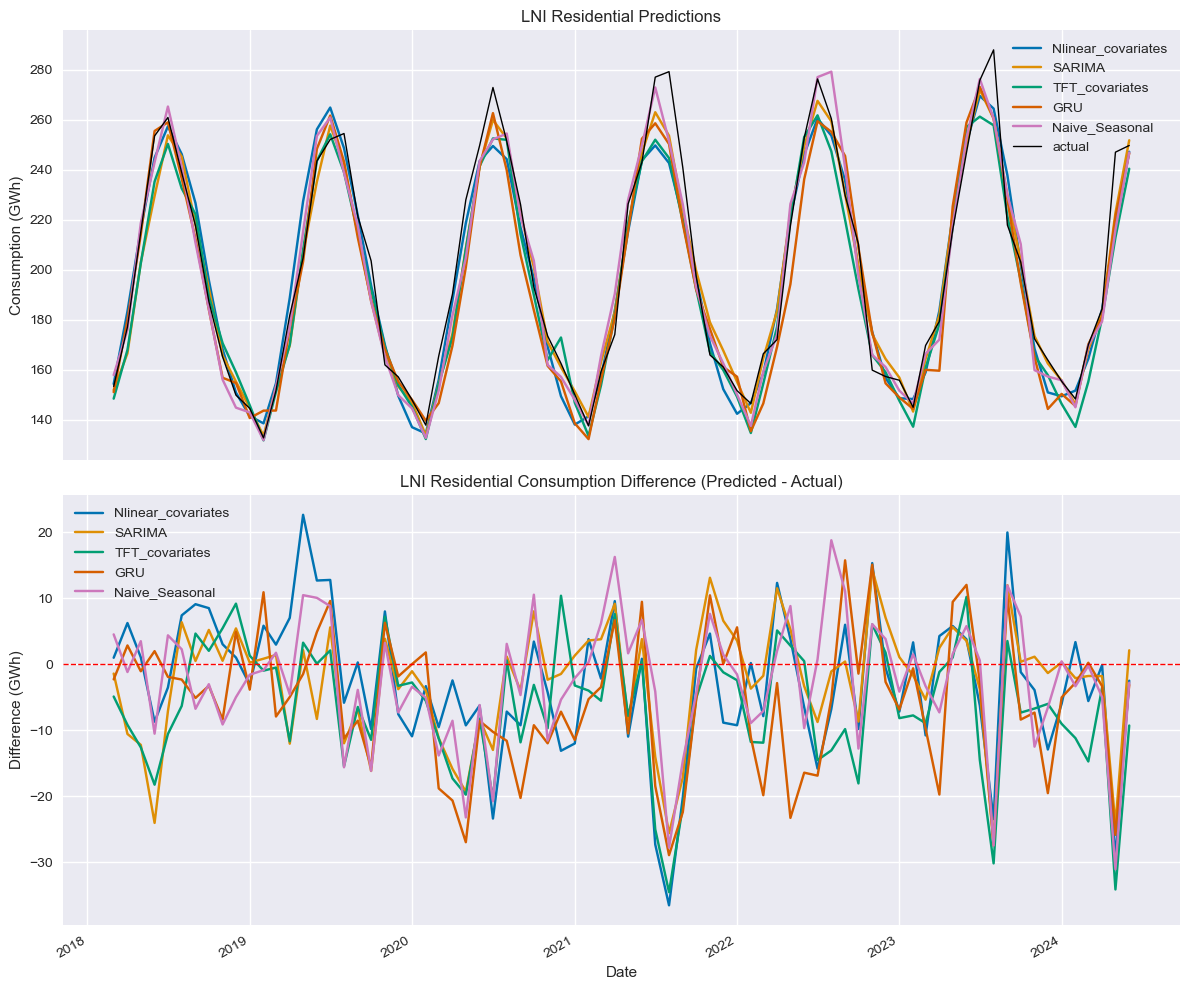

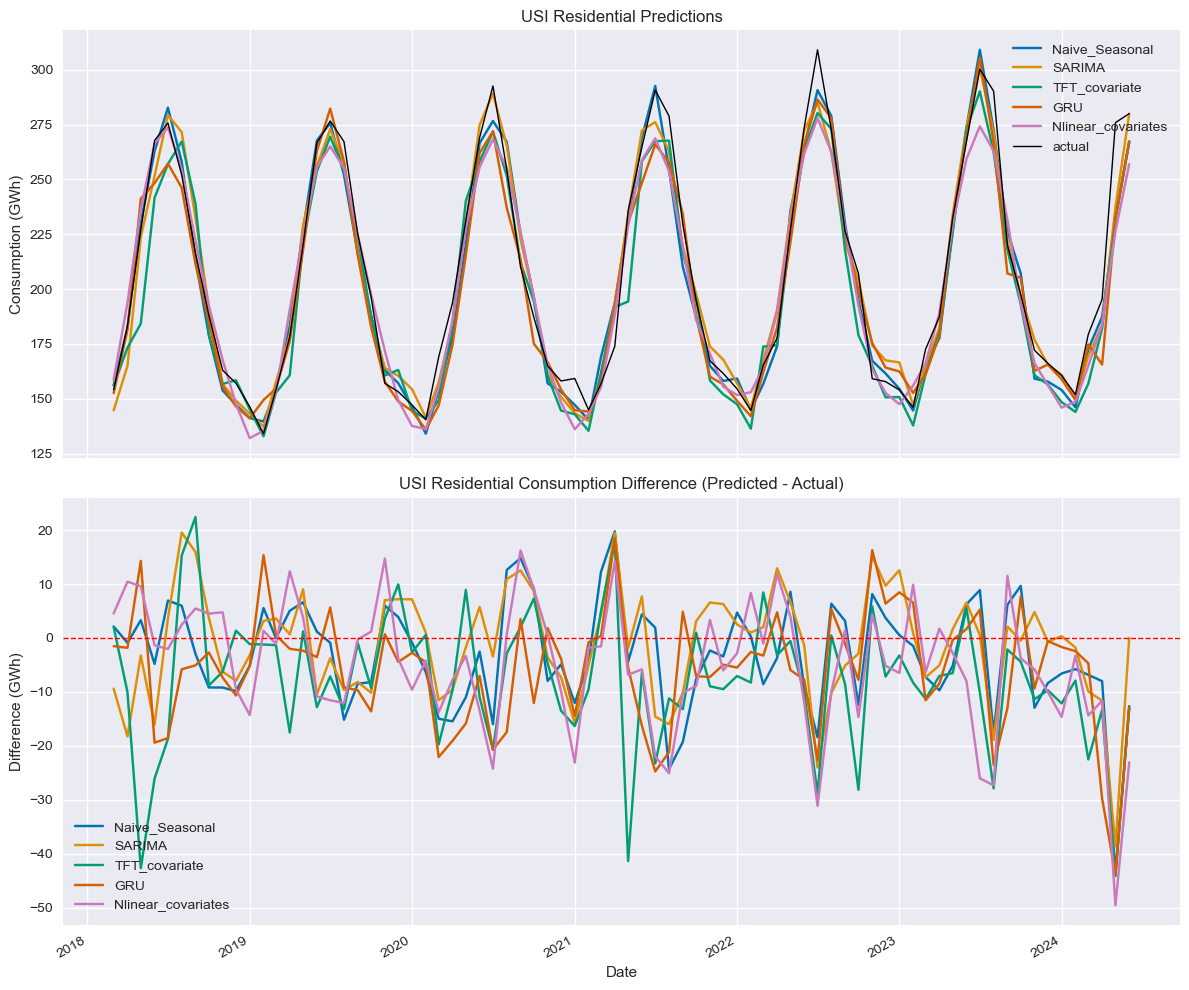

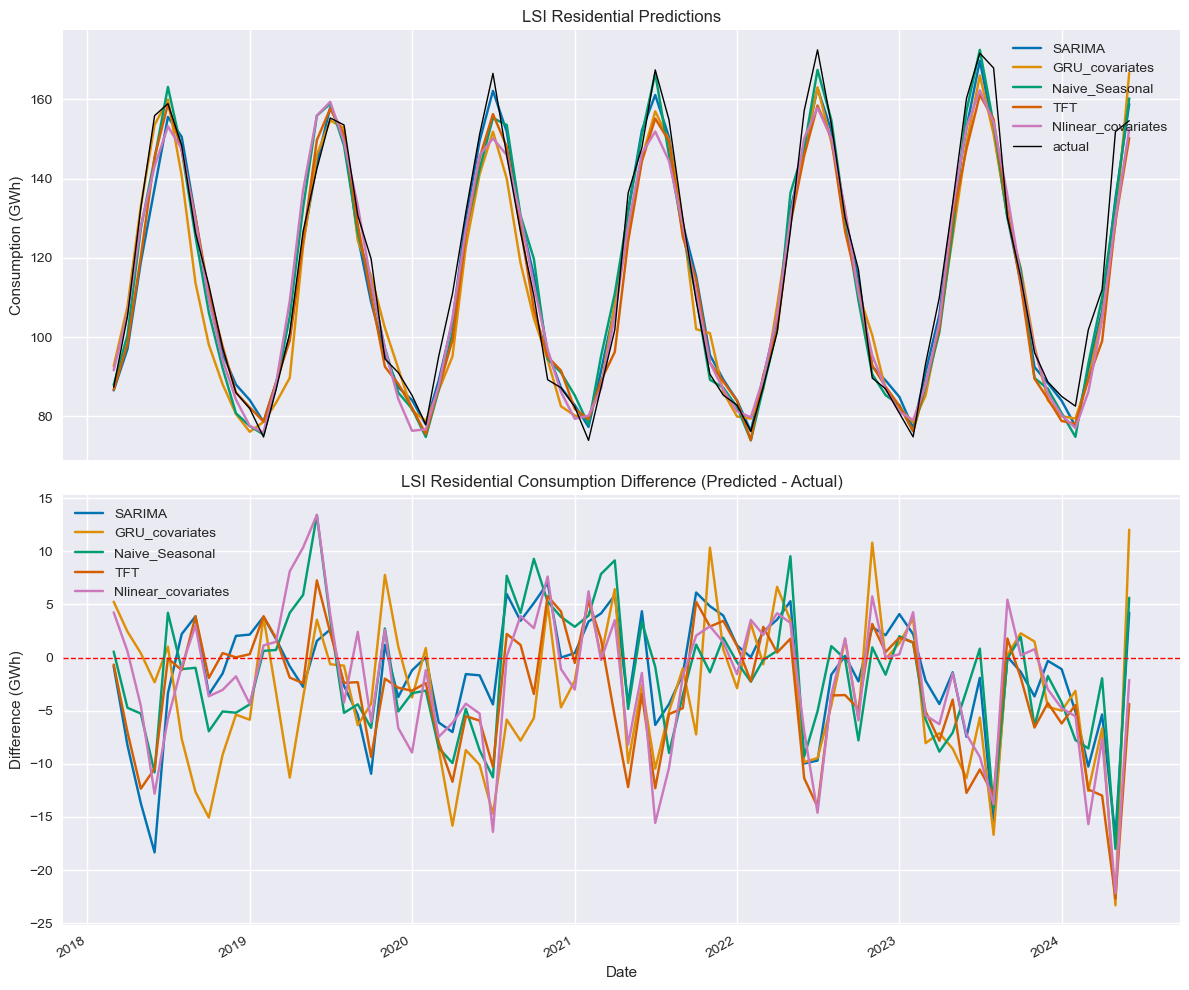

In [2]:
zones = ['uni', 'cni', 'lni', 'usi', 'lsi']

plt.style.use('seaborn-v0_8')
color_palette = sns.color_palette("colorblind", 10)

for zone in zones:
    directory = 'res/' + zone
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(directory, csv_file)
        if csv_file.lower().find('tft') != -1:
            model_params = csv_file.split('.')[0]
        else:
            model_params = csv_file.split(',')[0]
        df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
        color = color_palette[i % len(color_palette)]
        ax1.plot(df.index, df['predictions'], label=model_params, color=color)
        ax2.plot(df.index, df['difference'], label=model_params, color=color)
        if csv_file == csv_files[-1]:
            ax1.plot(df.index, df['actual'], label='actual', color='black', linewidth=1)
    
    ax1.set_title(zone.upper() + ' Residential Predictions')
    ax1.set_ylabel('Consumption (GWh)')
    ax1.legend()
    
    ax2.set_title(zone.upper() + ' Residential Consumption Difference (Predicted - Actual)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Difference (GWh)')
    ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    ax2.legend()
    
    fig.autofmt_xdate()
    
    # Use tight layout to prevent the labels from being cut off
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [3]:
# Read the lockdown period Excel file
lockdown_df = pd.read_excel('Lockdown period.xlsx', sheet_name='Sheet1')

# Convert the lockdown period dataframe's index to datetime
lockdown_df['Unnamed: 0'] = pd.to_datetime(lockdown_df['Unnamed: 0'])
lockdown_df.set_index('Unnamed: 0', inplace=True)

# Define color mapping for lockdown statuses
lockdown_colors = {'red': 'lightcoral', 'orange': 'orange', 'yellow': 'khaki'}

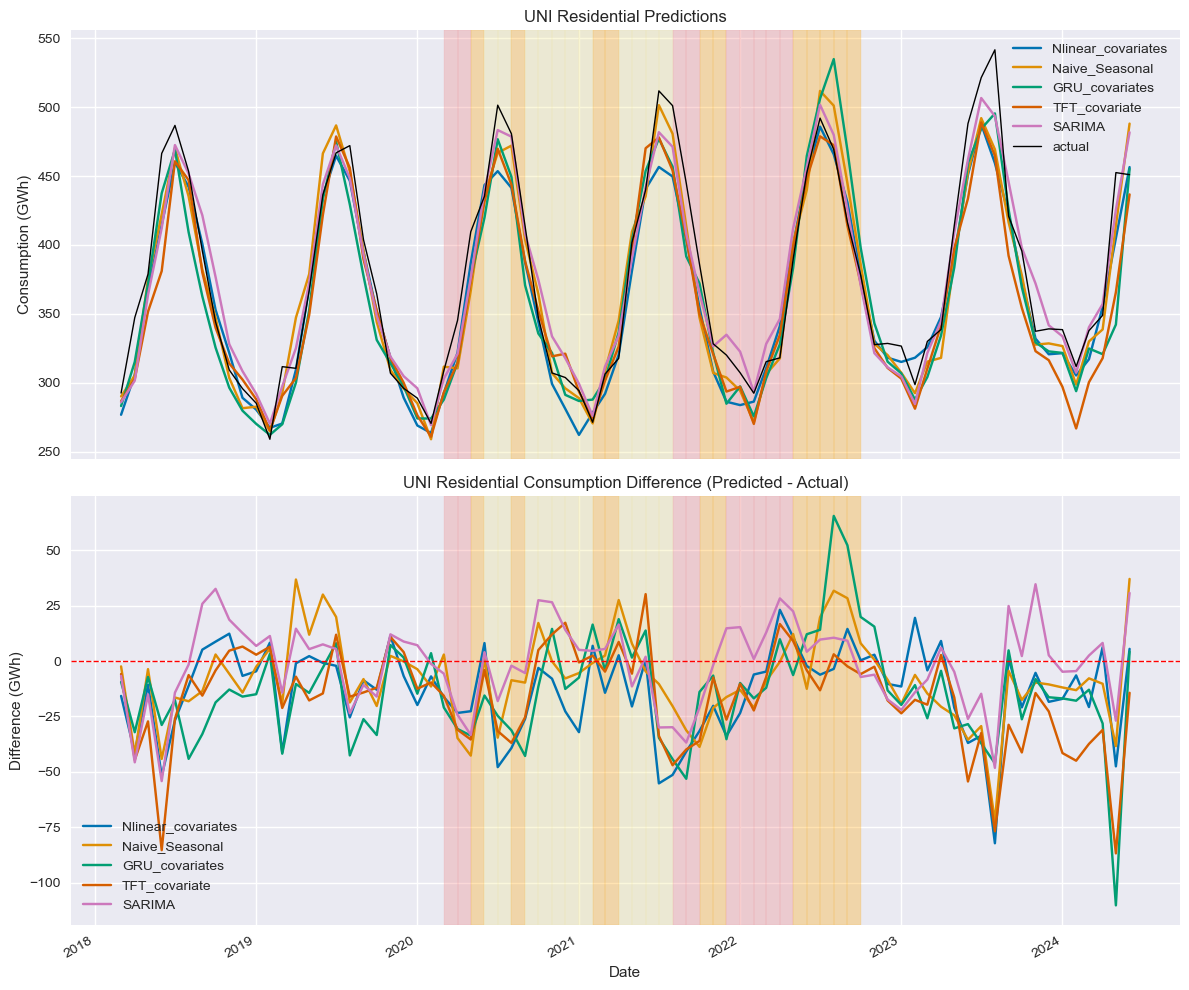

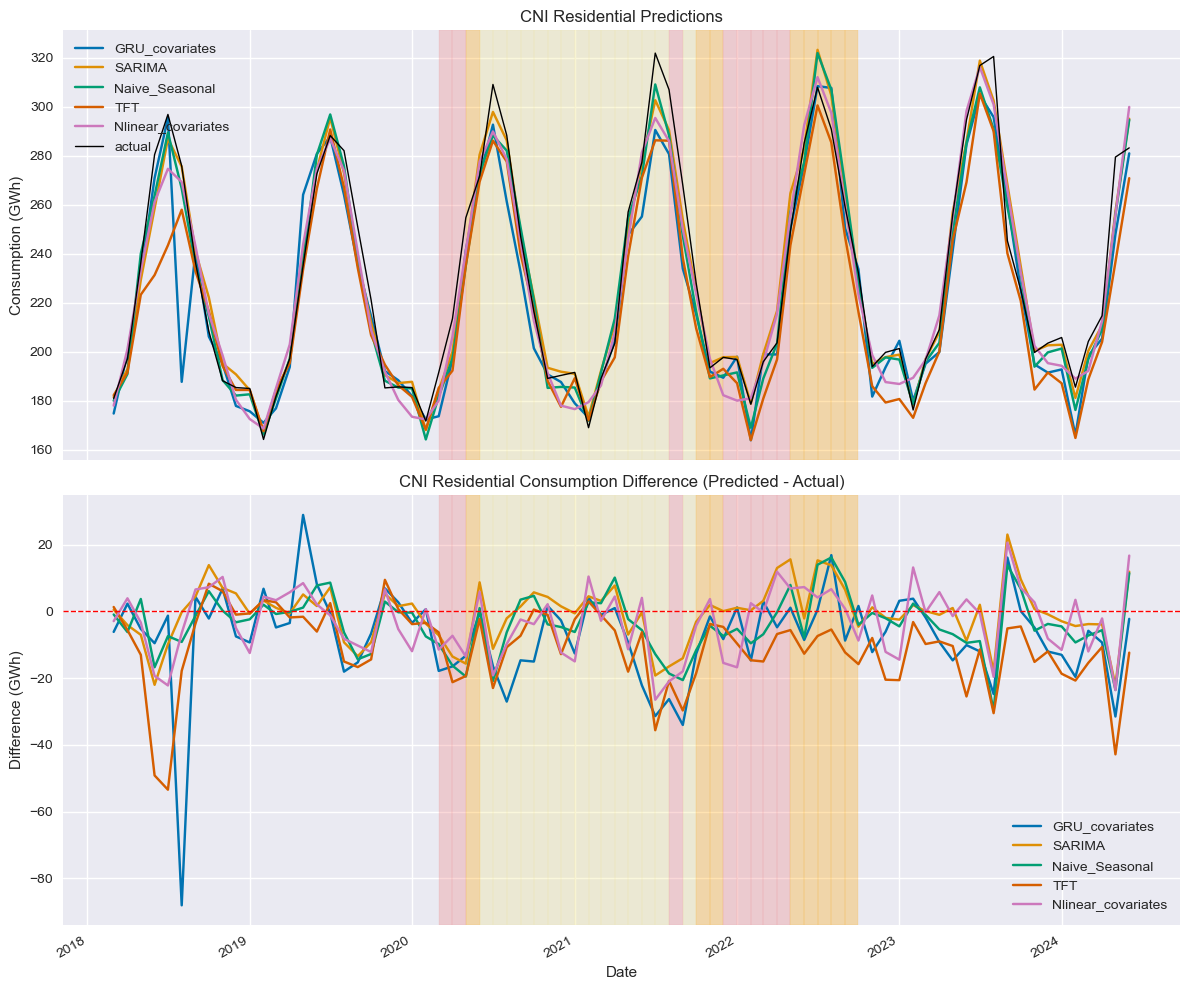

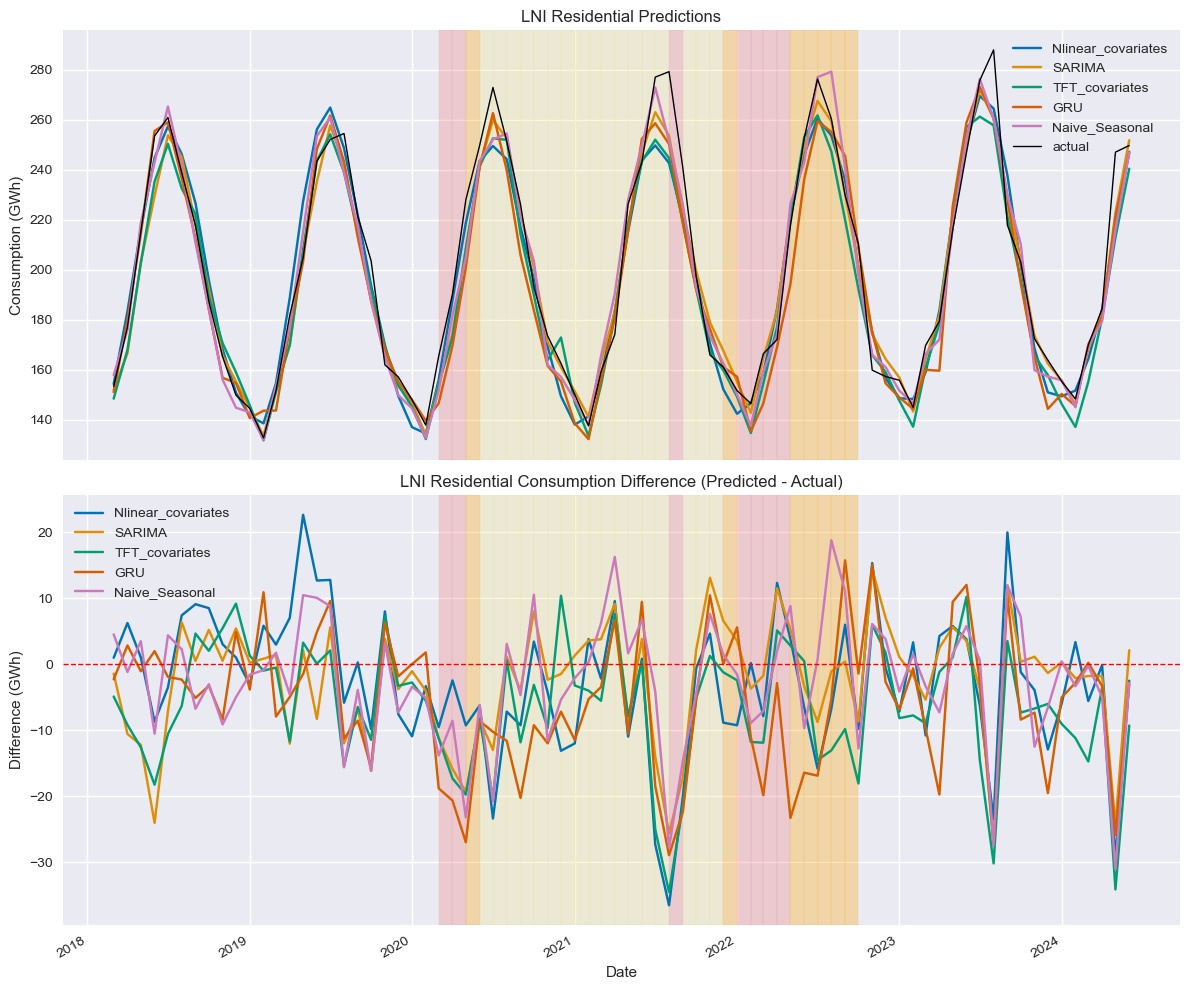

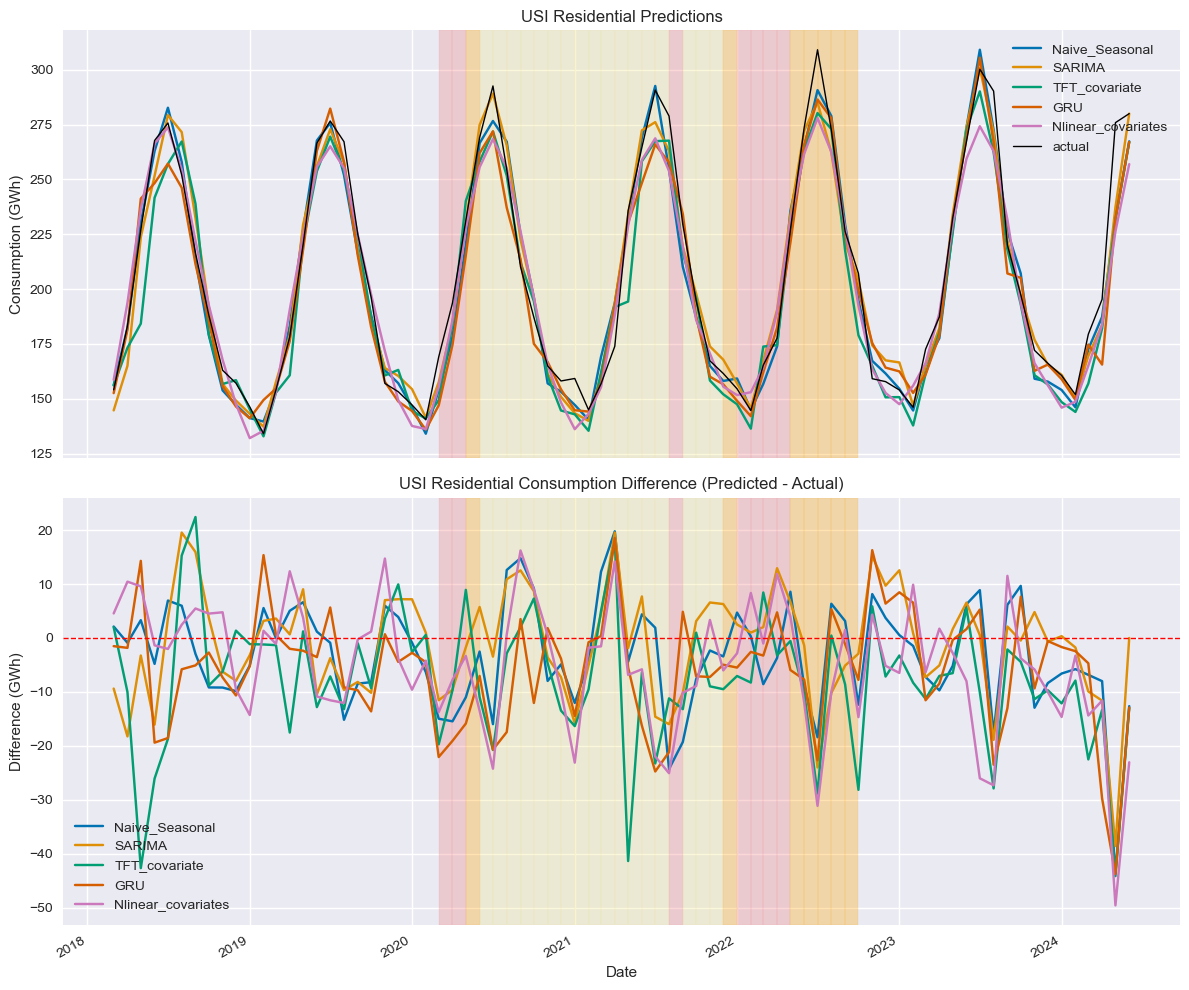

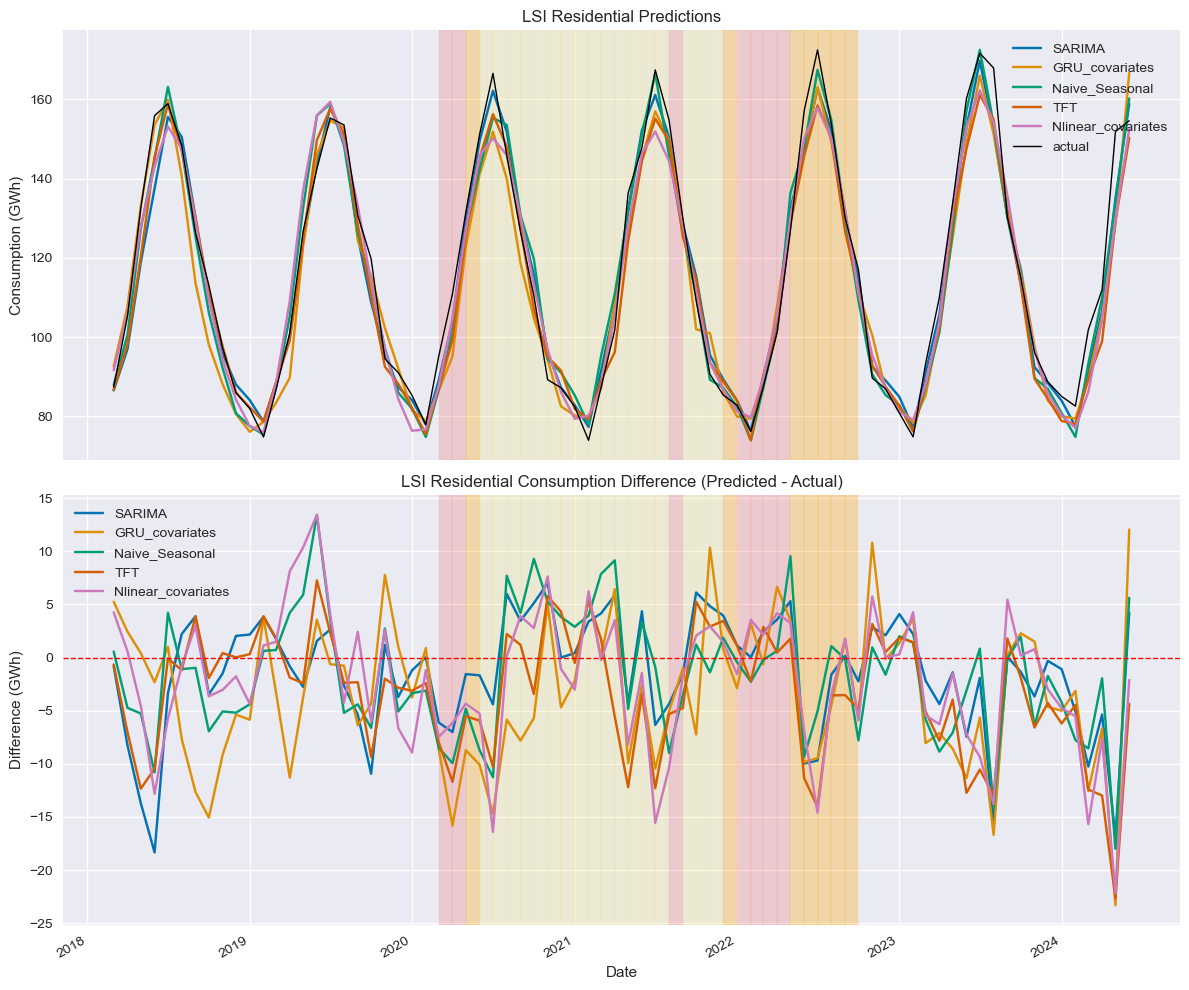

In [8]:
for zone in zones:
    directory = 'res/' + zone
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(directory, csv_file)
        if csv_file.lower().find('tft') != -1:
            model_params = csv_file.split('.')[0]
        else:
            model_params = csv_file.split(',')[0]
        df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
        color = color_palette[i % len(color_palette)]
        
        # Plot predictions and differences
        ax1.plot(df.index, df['predictions'], label=model_params, color=color)
        ax2.plot(df.index, df['difference'], label=model_params, color=color)
        if csv_file == csv_files[-1]:
            ax1.plot(df.index, df['actual'], label='actual', color='black', linewidth=1)

    # Highlight lockdown periods
    for date, lockdown_color in lockdown_df[zone.upper()].items():
        ax1.axvspan(date, date + pd.DateOffset(months=1), color=lockdown_colors[lockdown_color], alpha=0.3)
        ax2.axvspan(date, date + pd.DateOffset(months=1), color=lockdown_colors[lockdown_color], alpha=0.3)

    # Set titles, labels, and legends
    ax1.set_title(zone.upper() + ' Residential Predictions')
    ax1.set_ylabel('Consumption (GWh)')
    ax1.legend()

    ax2.set_title(zone.upper() + ' Residential Consumption Difference (Predicted - Actual)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Difference (GWh)')
    ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    ax2.legend()

    # Format x-axis dates
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    fig.autofmt_xdate()

    # Use tight layout to prevent the labels from being cut off
    plt.tight_layout()

    # Show the plot
    plt.show()

## Business

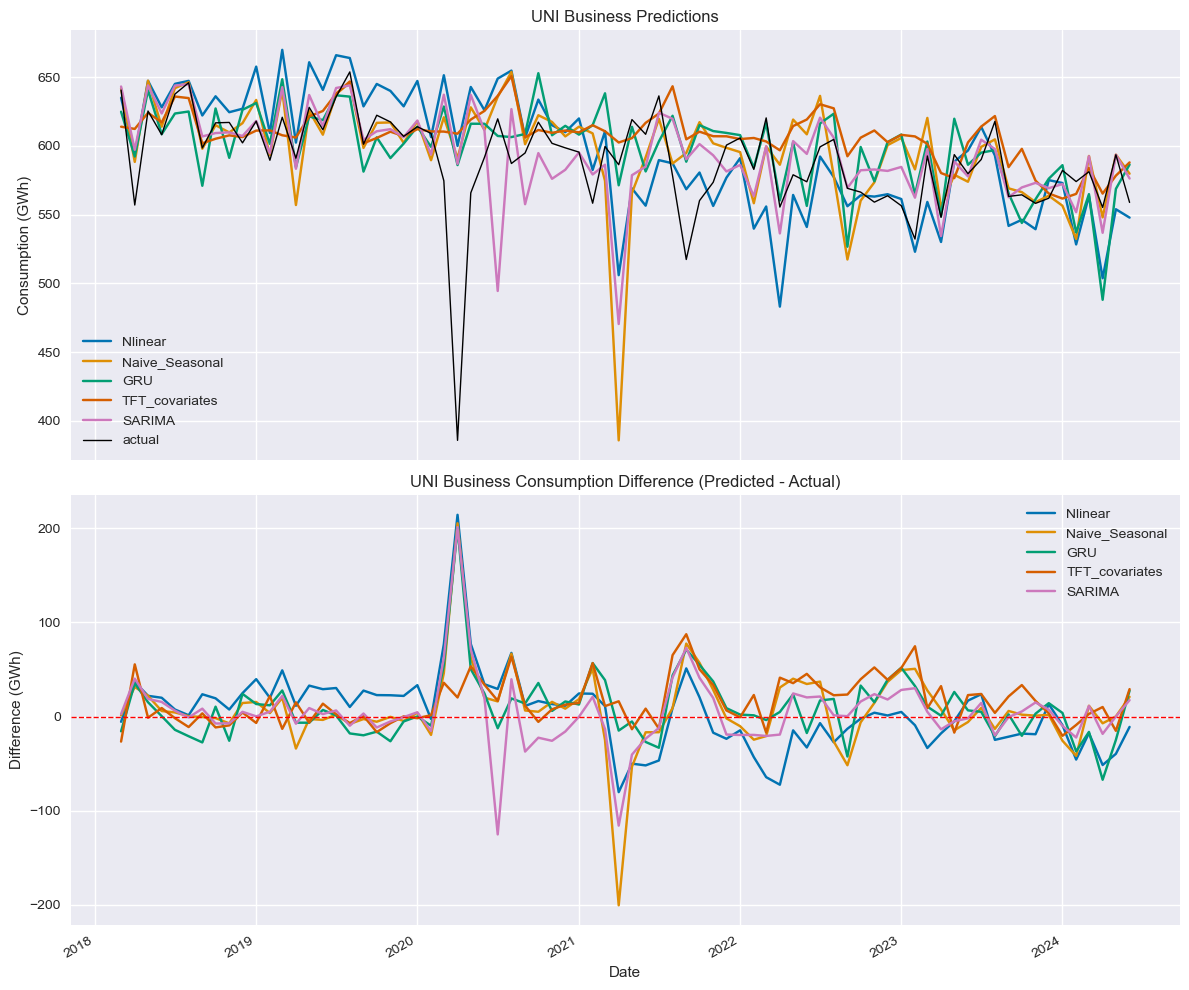

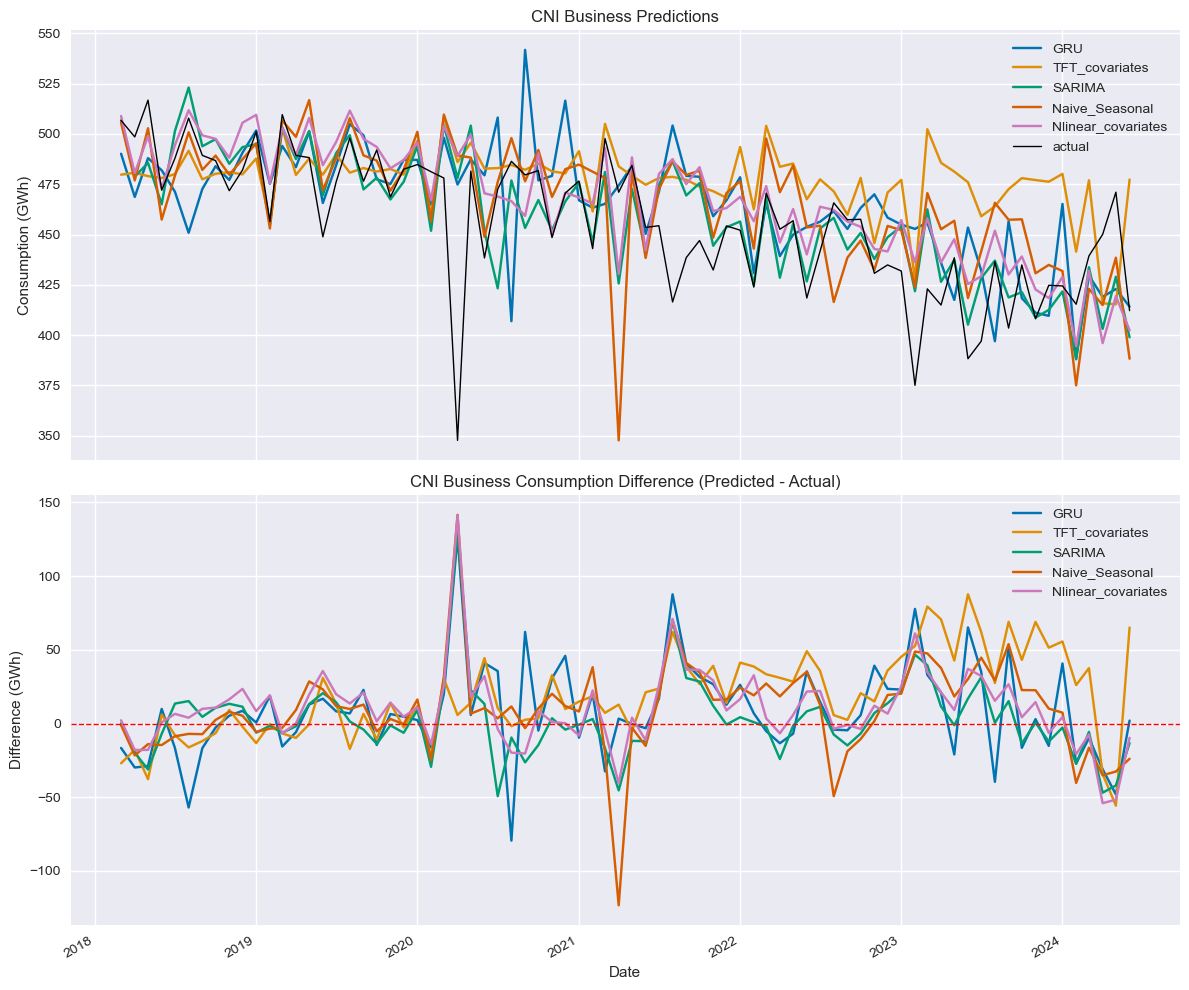

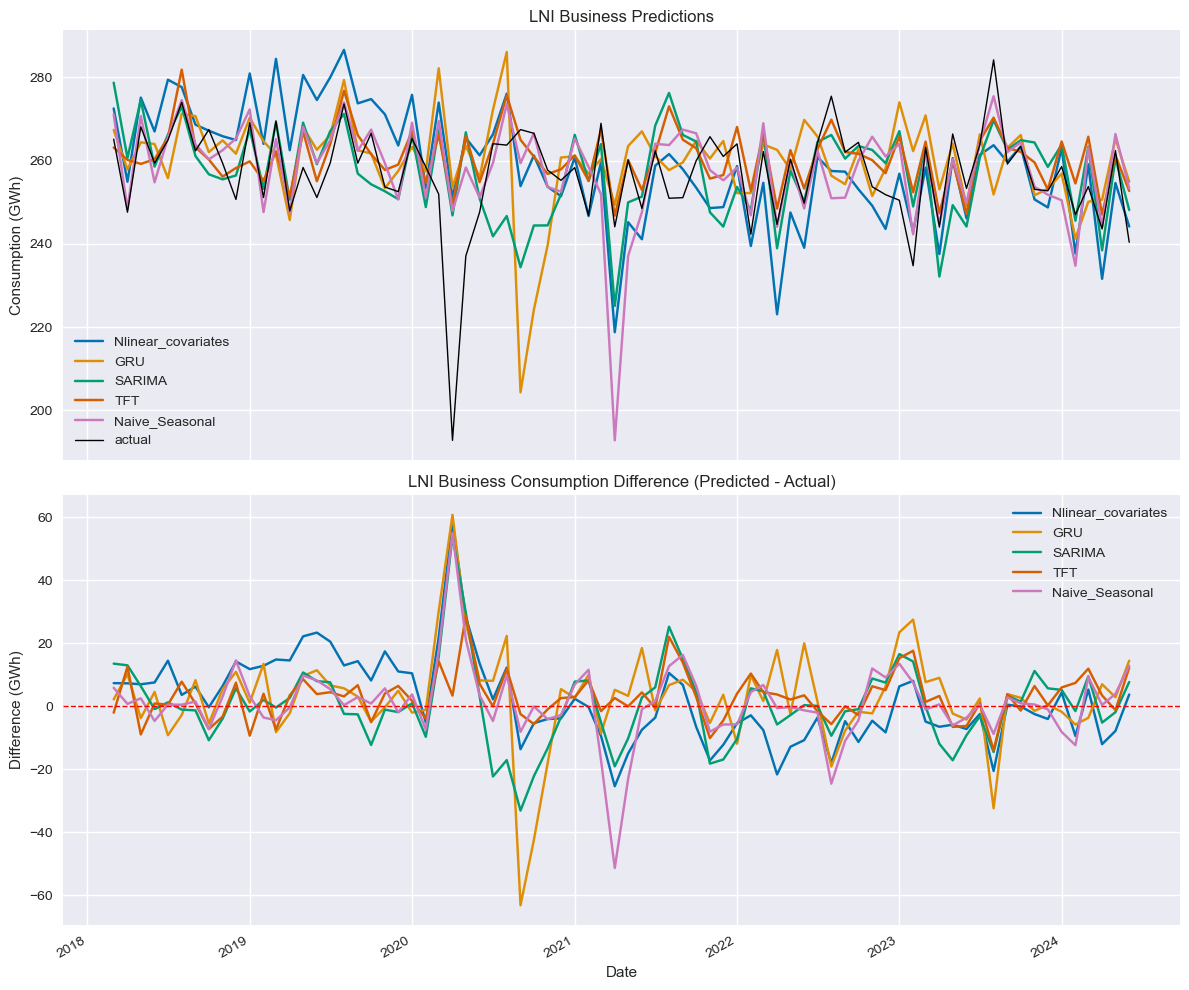

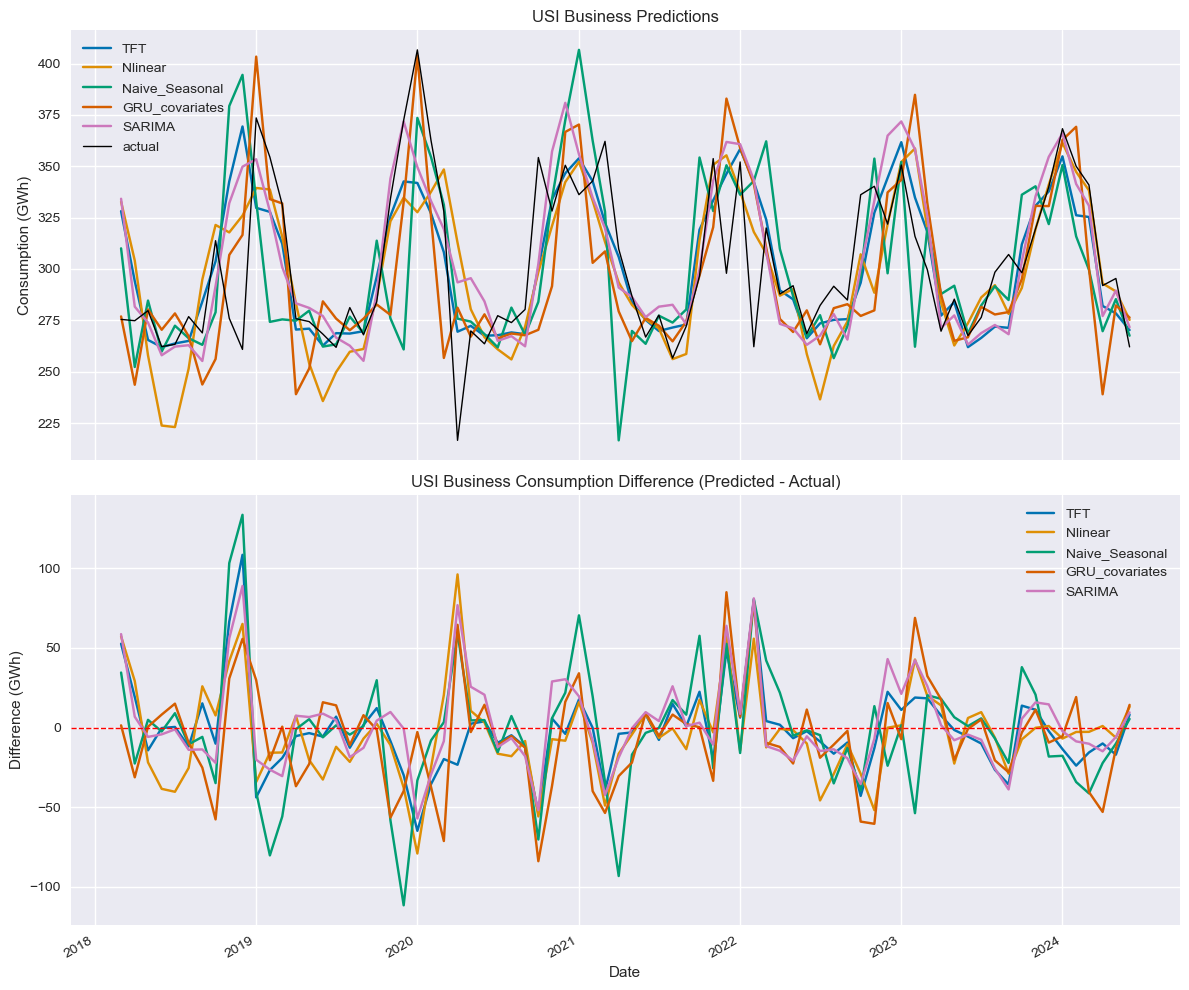

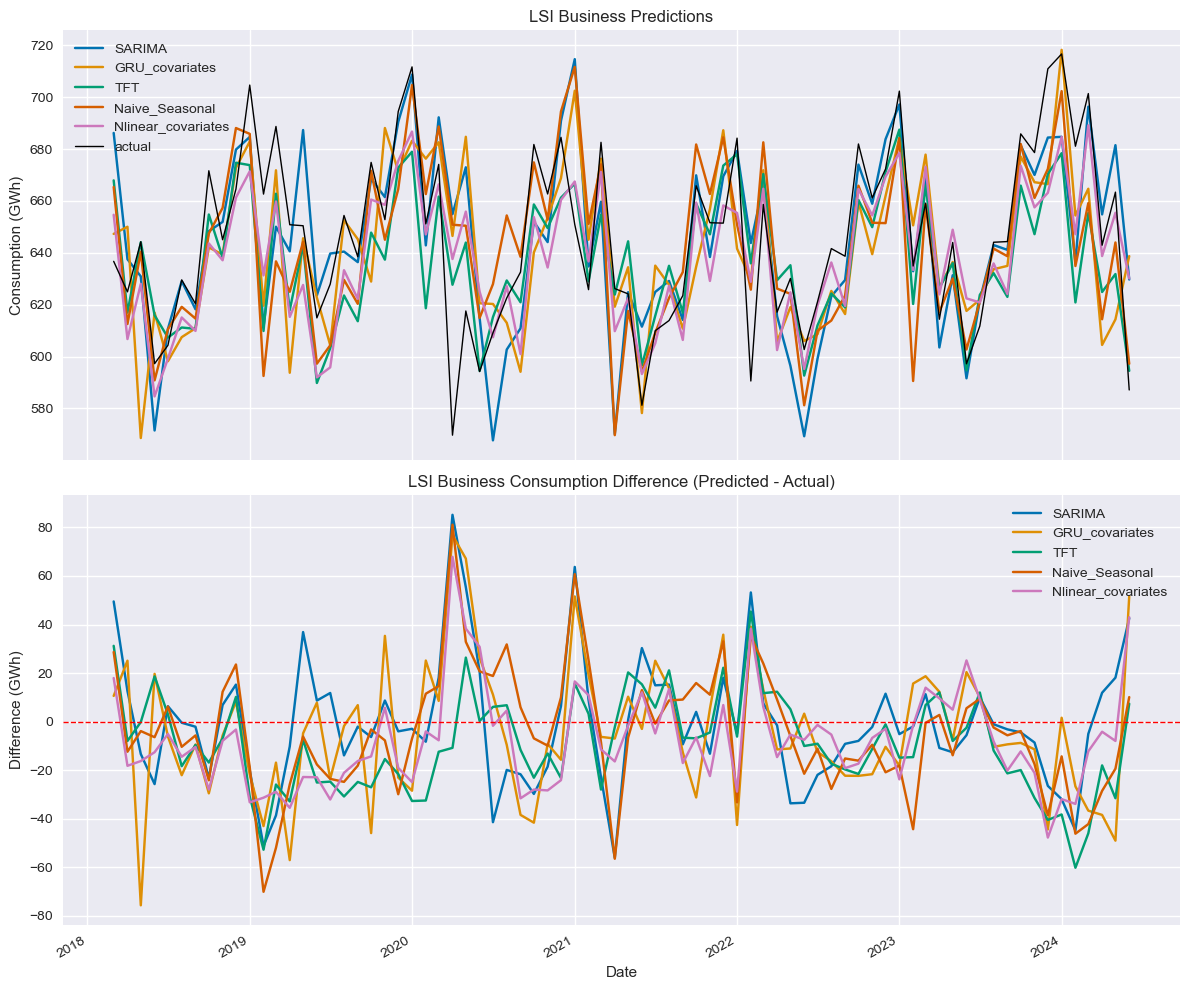

In [15]:
for zone in zones:
    directory = 'bus/' + zone
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(directory, csv_file)
        if csv_file.lower().find('tft') != -1:
            model_params = csv_file.split('.')[0]
        else:
            model_params = csv_file.split(',')[0]
        df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
        color = color_palette[i % len(color_palette)]
        ax1.plot(df.index, df['predictions'], label=model_params, color=color)
        ax2.plot(df.index, df['difference'], label=model_params, color=color)
        if csv_file == csv_files[-1]:
            ax1.plot(df.index, df['actual'], label='actual', color='black', linewidth=1)
    ax1.set_title(zone.upper() + ' Business Predictions')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Consumption (GWh)')
    ax1.legend()
    
    ax2.set_title(zone.upper() + ' Business Consumption Difference (Predicted - Actual)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Difference (GWh)')
    ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    ax2.legend()
    
    fig.autofmt_xdate()
    
    # Use tight layout to prevent the labels from being cut off
    plt.tight_layout()
    
    # Show the plot
    plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

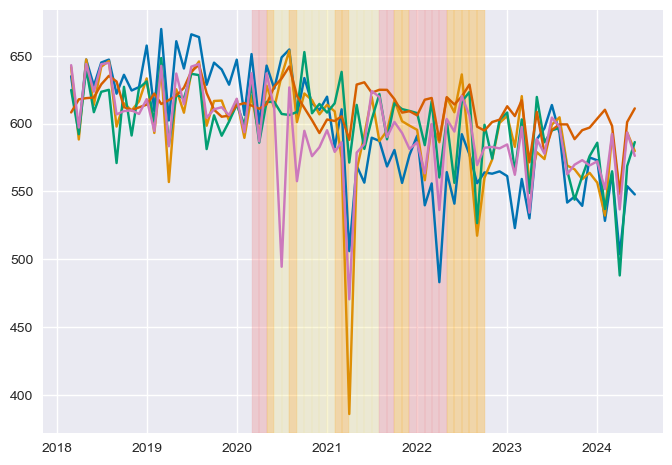

In [6]:
for zone in zones:
    directory = 'bus/' + zone
    #fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    
    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(directory, csv_file)
        if csv_file.lower().find('tft') != -1:
            model_params = csv_file.split('.')[0]
        else:
            model_params = csv_file.split(',')[0]
        df = pd.read_csv(file_path, parse_dates=[0], index_col=0)
        color = color_palette[i % len(color_palette)]
        
        # Plot predictions and differences
        plt.plot(df.index, df['predictions'], label=model_params, color=color, )
        #ax2.plot(df.index, df['difference'], label=model_params, color=color)
        
        # Plot actual data if this is the last CSV file
        if csv_file == csv_files[-1]:
            ax1.plot(df.index, df['actual'], label='actual', color='black', linewidth=1)

    # Highlight lockdown periods
    for date, lockdown_color in lockdown_df[zone.upper()].items():
        plt.axvspan(date, date + pd.DateOffset(months=1), color=lockdown_colors[lockdown_color], alpha=0.3)
        #ax2.axvspan(date, date + pd.DateOffset(months=1), color=lockdown_colors[lockdown_color], alpha=0.3)

    # Set titles, labels, and legends
    plt.set_title(zone.upper() + ' Business Predictions')
    plt.set_xlabel('Date')
    plt.set_ylabel('Consumption (GWh)')
    plt.legend()

    #ax2.set_title(zone.upper() + ' Business Consumption Difference (Predicted - Actual)')
    #ax2.set_xlabel('Date')
    #ax2.set_ylabel('Difference (GWh)')
    #ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    #ax2.legend()

    # Format x-axis dates
    plt.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    fig.autofmt_xdate()

    # Use tight layout to prevent the labels from being cut off
    plt.tight_layout()

    # Show the plot
    plt.show()